In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
from sklearn.datasets import make_blobs

In [202]:
data=make_blobs(n_samples=300,
                n_features=2,
                centers=2,
                cluster_std=1.0,random_state=101)

X,y=data

np.random.seed(seed=101)
z_noise=np.random.normal(size=len(X))
z_noise=pd.Series(z_noise)

In [203]:
feat=pd.DataFrame(X)
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [204]:
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


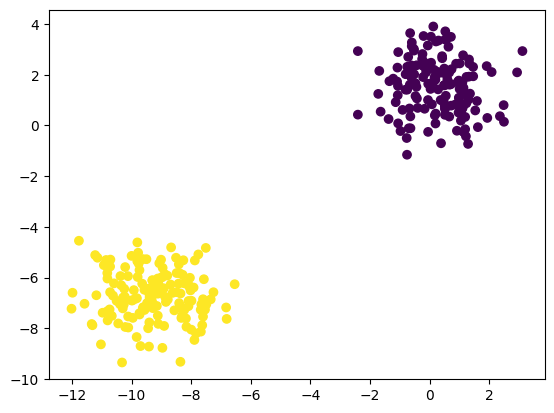

In [205]:
plt.scatter(feat['X1'],feat['X2'],c=y)

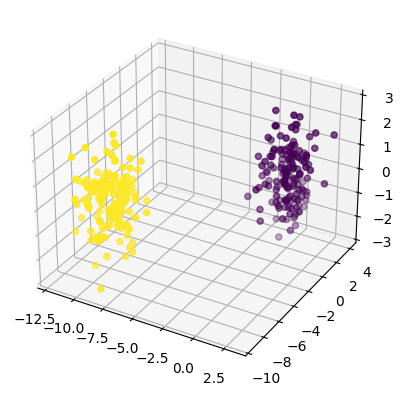

In [206]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y) 

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD #Stochastic Gradient Descent

In [208]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))

In [209]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [210]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 4ms/step - loss: 0.2656
Epoch 2/5
10/10 [==============================] - 0s 4ms/step - loss: 0.2484
Epoch 3/5
10/10 [==============================] - 0s 4ms/step - loss: 0.2606
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 0.2444
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.2466


In [211]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 3ms/step


In [212]:
scaled_data.shape # 3D data

(300, 3)

In [213]:
encoded_2dim.shape # 2D data

(300, 2)

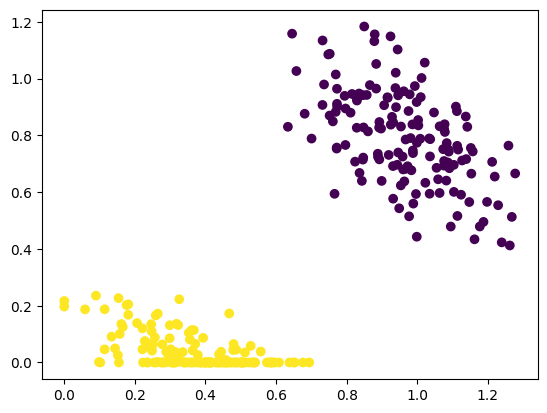

In [214]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)